In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.max_columns = None

In [3]:
custom_na_values = ["Sin información", "Sin informacion", 'Na', "Nd", 'No aplica']

## Casos

### Leer datos

In [5]:
df_map = pd.read_csv('../../data/memoria_historica/casos_map_muse.csv', na_values=custom_na_values)

In [7]:
df_map = df_map.rename(
    {"ANNOH": "AÑO", "MUNINICIO_CASO": "MUNICIPIO", "DEPTO_CASO": "DEPARTAMENTO"}, 
    axis="columns")
df_map["AÑO"] = df_map["AÑO"].replace(0, np.nan)
df_map["DEPARTAMENTO"] = df_map["DEPARTAMENTO"].replace(
    {"Archipiélago de san andrés, providencia y santa catalina": "San Andrés", "La Guajira": "Guajira"}
).str.title().str.strip()
df_map["MUNICIPIO"] = df_map["MUNICIPIO"].str.title().str.strip()
df_map["MUNICIPIO_DEPARTAMENTO"] = df_map["MUNICIPIO"] + " (" + df_map["DEPARTAMENTO"] + ")"

In [8]:
df_map

,IdCaso,IdCasoRelacionado,DIAH,MESH,AÑO,REGION,DEPARTAMENTO,MUNICIPIO,Modalidad,NombreTipoEvento,TipoArmas,PRESUNTO_REPONSABLE1,DESCRIPCION_PRESUNTO_RESPONSABLE1,AbandonoDespojoForzadoTierras,AmenazaIntimidacion,AtaqueContraMisionMedica,ConfinamientoRestriccionMovilidad,DesplazamientoForzado,Extorsion,LesionadosCiviles,Pillaje,Tortura,ViolenciaBasadaGenero,OtroHechoSimultaneo,T_CICOLE,TotalCivilesMuertos,TotalCombatientesMuertos,TotalCivilesCombatientesMuertos,NumeroVictimasCaso,Estado,MUNICIPIO_DEPARTAMENTO
0,12200,Cr201712202,18,3,1998.0,Valle de aburra,Antioquia,Medellín,Atentado,Atentado por map,Minas antipersonal (map),Guerrilla,Eln,0,0,0,1,0,0,0.0,0,0.0,NaN,NaN,NaN,0.0,1.0,1,1,Publicado,Medellín (Antioquia)
1,23137,Cr201723137,26,9,2004.0,Florencia y area de influencia,Caquetá,Milán,Incidente,Producción de minas,Minas antipersonal (map),Guerrilla,Farc,0,0,0,0,0,0,0.0,0,0.0,NaN,NaN,NaN,2.0,0.0,2,2,Publicado,Milán (Caquetá)
2,30097,NaN,29,4,2012.0,Norte del huila,Huila,Colombia,Atentado,Atentado por map,Minas antipersonal (map),Guerrilla,Farc,0,0,0,0,0,0,0.0,0,0.0,NaN,NaN,NaN,0.0,1.0,1,1,Publicado,Colombia (Huila)
3,55347,NaN,5,10,2005.0,Oriente antioqueño,Antioquia,Argelia,Atentado,Atentado por map,Artefacto explosivo,Guerrilla,No identificada,0,1,0,0,0,0,0.0,0,0.0,NaN,NaN,NaN,1.0,NaN,1,1,Publicado,Argelia (Antioquia)
4,66820,Cr018278,7,5,2004.0,Oriente antioqueño,Antioquia,Concepción,Atentado,Atentado por aie,Artefacto explosivo,Desconocido,NaN,0,0,0,0,0,0,0.0,0,0.0,NaN,NaN,NaN,2.0,NaN,2,2,Publicado,Concepción (Antioquia)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8947,521971,NaN,10,2,2009.0,Ariari guayabero,Meta,Mesetas,Atentado,Atentado por map,Minas antipersonal (map),Desconocido,NaN,0,0,0,0,0,0,NaN,0,NaN,NaN,NaN,0.0,0.0,0.0,3,3,Publicado,Mesetas (Meta)
8948,532493,NaN,5,9,1997.0,Nordeste antioqueño,Antioquia,Anorí,Atentado,Atentado por map,Minas antipersonal (map),Guerrilla,Eln,0,0,0,0,0,0,NaN,0,NaN,NaN,NaN,3.0,0.0,0.0,3,3,Publicado,Anorí (Antioquia)
8949,532494,NaN,12,10,2010.0,NaN,Nariño,NaN,Atentado,Atentado por map,Minas antipersonal (map),Grupo armado no identificado,NaN,0,0,0,0,0,0,NaN,0,NaN,NaN,NaN,4.0,0.0,0.0,8,8,Publicado,NaN
8950,532495,NaN,1,4,2017.0,Atrato,Chocó,Riosucio,Atentado,Atentado por map,Minas antipersonal (map),Grupo armado no identificado,NaN,0,0,0,0,0,0,NaN,0,NaN,NaN,NaN,1.0,0.0,0.0,1,1,Publicado,Riosucio (Chocó)


<AxesSubplot:xlabel='AÑO', ylabel='TotalCivilesCombatientesMuertos'>

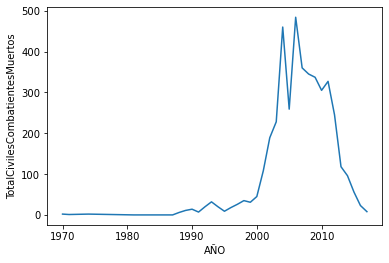

In [9]:
sns.lineplot(data=df_map.groupby("AÑO").agg({"TotalCivilesCombatientesMuertos": "sum"}).reset_index(), x="AÑO", y="TotalCivilesCombatientesMuertos")

<AxesSubplot:xlabel='TotalCivilesCombatientesMuertos', ylabel='DEPARTAMENTO'>

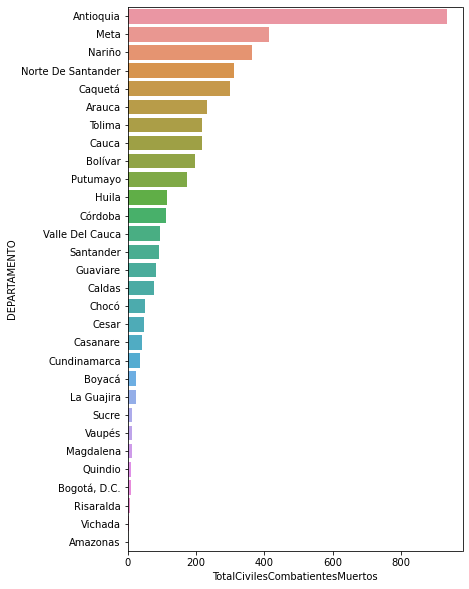

In [11]:
plt.figure(figsize=(6, 10))
sns.barplot(data=df_map.groupby("DEPARTAMENTO").agg({"TotalCivilesCombatientesMuertos": "sum"}) \
            .sort_values("TotalCivilesCombatientesMuertos", ascending=False) \
            .reset_index(), 
            y="DEPARTAMENTO", x="TotalCivilesCombatientesMuertos")

In [24]:
df_map.agg({"AbandonoDespojoForzadoTierras": "sum", "AmenazaIntimidacion" : "sum", "AtaqueContraMisionMedica": "sum",
           "ConfinamientoRestriccionMovilidad": "sum", "DesplazamientoForzado": "sum", "Extorsion": "sum", "Pillaje": "sum",
           "Tortura": "sum"})

AbandonoDespojoForzadoTierras         9.0
AmenazaIntimidacion                  16.0
AtaqueContraMisionMedica              0.0
ConfinamientoRestriccionMovilidad    10.0
DesplazamientoForzado                20.0
Extorsion                             2.0
Pillaje                               1.0
Tortura                               0.0
dtype: float64

<AxesSubplot:xlabel='T_CICOLE', ylabel='TotalCivilesCombatientesMuertos'>

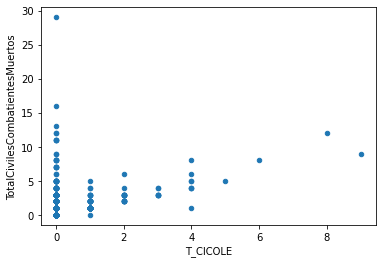

In [29]:
df_map.plot(kind="scatter", x="T_CICOLE", y="TotalCivilesCombatientesMuertos")

<AxesSubplot:xlabel='TotalCivilesMuertos', ylabel='TotalCombatientesMuertos'>

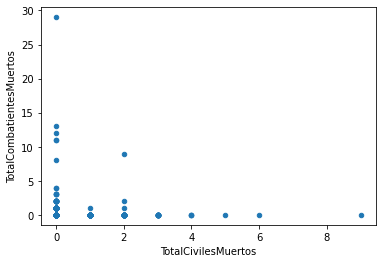

In [30]:
df_map.plot(kind="scatter", x="TotalCivilesMuertos", y="TotalCombatientesMuertos")

## Víctimas

In [31]:
df_victimas = pd.read_csv('../../data/memoria_historica/victimas_map_muse.csv', na_values=custom_na_values)

In [32]:
df_victimas = df_victimas.rename(
    {"ANNOH": "AÑO", "MUNINICIO_CASO": "MUNICIPIO", "DEPTO_CASO": "DEPARTAMENTO"}, 
    axis="columns")
df_victimas["AÑO"] = df_map["AÑO"].replace(0, np.nan)
df_victimas["DEPARTAMENTO"] = df_map["DEPARTAMENTO"].replace(
    {"Archipiélago de san andrés, providencia y santa catalina": "San Andrés", "La Guajira": "Guajira"}
).str.title().str.strip()
df_victimas["MUNICIPIO"] = df_map["MUNICIPIO"].str.title().str.strip()
df_victimas["MUNICIPIO_DEPARTAMENTO"] = df_map["MUNICIPIO"] + " (" + df_map["DEPARTAMENTO"] + ")"

In [33]:
df_victimas

,IdCaso,Id,DIAH,MESH,AÑO,COD_DANE_MUN,DEPARTAMENTO,MUNICIPIO,Sexo,Etnia,OcupacionVictima,CalidadVictima,TipoPoblacionVulnerable,Grupo,DESCRIPCION_GRUPO,SituacionActualVictima,AfectacionHeridos,CircunstanciaMuerteVictima,ActividadDesarrolladaMomentoAfectacion,Estado,MUNICIPIO_DEPARTAMENTO
0,12200,20567,18,3,1998.0,5001,Antioquia,Medellín,H,NaN,Fuerza pública,Combatiente,NaN,Agente del estado,Ejército nacional,Muerta,NaN,NaN,Operaciones militares,Publicado,Medellín (Antioquia)
1,445045,23449,20,10,2004.0,44420,Caquetá,Milán,H,NaN,NaN,Civil,NaN,NaN,NaN,Muerta,NaN,Murió en el lugar de los hechos,Operaciones militares,Publicado,Milán (Caquetá)
2,23137,38302,26,9,2012.0,18460,Huila,Colombia,H,NaN,Campesino,Civil,NaN,NaN,NaN,Muerta,NaN,Murió en el lugar de los hechos,Tránsito por trocha o camino,Publicado,Colombia (Huila)
3,23137,38303,26,9,2005.0,18460,Antioquia,Argelia,H,NaN,Campesino,Civil,NaN,NaN,NaN,Muerta,NaN,Murió en el lugar de los hechos,Tránsito por trocha o camino,Publicado,Argelia (Antioquia)
4,446886,40537,3,8,2004.0,73168,Antioquia,Concepción,H,NaN,Fuerza pública,Combatiente,NaN,Agente del estado,Ejército nacional,Muerta,NaN,Murió en el lugar de los hechos,Operaciones militares,Publicado,Concepción (Antioquia)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9618,532502,580483,22,3,NaN,19821,NaN,NaN,H,NaN,Fuerza pública,Combatiente,NaN,Agente del estado,Ejército nacional,NaN,NaN,NaN,Operaciones militares,Publicado,NaN
9619,532502,580484,22,3,NaN,19821,NaN,NaN,H,NaN,Fuerza pública,Combatiente,NaN,Agente del estado,Ejército nacional,NaN,NaN,NaN,Operaciones militares,Publicado,NaN
9620,532502,580485,22,3,NaN,19821,NaN,NaN,H,NaN,Fuerza pública,Combatiente,NaN,Agente del estado,Ejército nacional,NaN,NaN,NaN,Operaciones militares,Publicado,NaN
9621,532502,580487,22,3,NaN,19821,NaN,NaN,H,NaN,Fuerza pública,Combatiente,NaN,Agente del estado,Ejército nacional,NaN,NaN,NaN,Operaciones militares,Publicado,NaN


<AxesSubplot:xlabel='victimas', ylabel='SituacionActualVictima'>

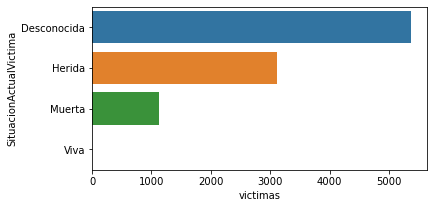

In [41]:
plt.figure(figsize=(6, 3))
sns.barplot(data=df_victimas.groupby("SituacionActualVictima").size().sort_values(ascending=False) \
            .reset_index().rename({0: "victimas"}, axis="columns"), 
            y="SituacionActualVictima", x="victimas")

<AxesSubplot:xlabel='victimas', ylabel='CalidadVictima'>

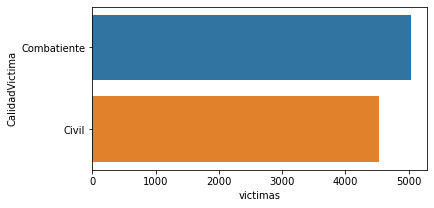

In [40]:
plt.figure(figsize=(6, 3))
sns.barplot(data=df_victimas.groupby("CalidadVictima").size().sort_values(ascending=False) \
            .reset_index().rename({0: "victimas"}, axis="columns"), 
            y="CalidadVictima", x="victimas")

<AxesSubplot:xlabel='victimas', ylabel='ActividadDesarrolladaMomentoAfectacion'>

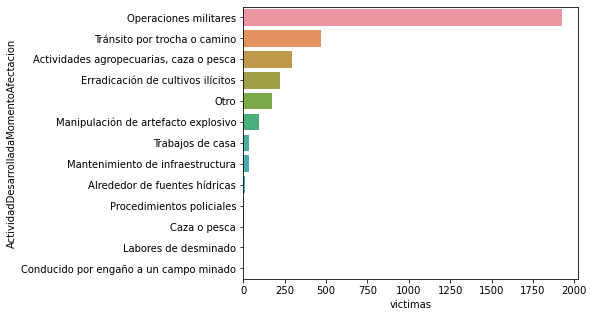

In [39]:
plt.figure(figsize=(6, 5))
sns.barplot(data=df_victimas.groupby("ActividadDesarrolladaMomentoAfectacion").size().sort_values(ascending=False) \
            .reset_index().rename({0: "victimas"}, axis="columns"), 
            y="ActividadDesarrolladaMomentoAfectacion", x="victimas")

In [46]:
df_victimas["ActividadDesarrolladaMomentoAfectacion"].unique()

array(['Operaciones militares', 'Tránsito por trocha o camino', 'Otro',
       'Actividades agropecuarias, caza o pesca', nan,
       'Manipulación de artefacto explosivo',
       'Erradicación de cultivos ilícitos',
       'Alrededor de fuentes hídricas', 'Trabajos de casa',
       'Mantenimiento de infraestructura', 'Procedimientos policiales',
       'Labores de desminado', 'Caza o pesca',
       'Conducido por engaño a un campo minado'], dtype=object)

<AxesSubplot:xlabel='AÑO', ylabel='victimas'>

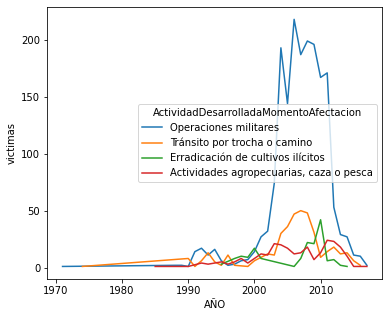

In [48]:
plt.figure(figsize=(6, 5))
sns.lineplot(data=
             df_victimas[df_victimas["ActividadDesarrolladaMomentoAfectacion"].isin(
                 ['Operaciones militares', 'Tránsito por trocha o camino', 'Erradicación de cultivos ilícitos',
                   'Actividades agropecuarias, caza o pesca']
             )].groupby(["AÑO", "ActividadDesarrolladaMomentoAfectacion"]).size().sort_values(ascending=False) \
            .reset_index().rename({0: "victimas"}, axis="columns"), 
            y="victimas", x="AÑO", hue="ActividadDesarrolladaMomentoAfectacion")